<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import string

In [2]:
df = pd.read_csv('/content/Hamspam.csv',encoding='ISO-8859-1')

In [3]:
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


In [4]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [5]:
df.isnull().sum()

type    0
text    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


In [7]:
def clean_text(text):
  text = text.lower()
  text = re.sub('\[.*!&?]','',text)
  text =re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text = re.sub('\w*\d\w*','',text)
  text = re.sub('[0-9' ']+','',text)
  text = re.sub('[''""...]','',text)
  return text
  clean = lambda x: clean_text(x)

In [8]:
 clean = lambda x: clean_text(x)

In [9]:
df['text'] = df.text.apply(clean)

In [10]:
df.text

0        hope you are having a good week just checking in
1                                    kgive back my thanks
2               am also doing in cbe only but have to pay
3       complimentary  star ibiza holiday or å£ cash n...
4       okmail dear dave this is your final notice to ...
                              ...                        
5554    you are a great role model you are giving so m...
5555    awesome i remember the last time we got somebo...
5556    if you dont your prize will go to another cust...
5557    sms ac jsco energy is high but u may not know ...
5558                      shall call now dear having food
Name: text, Length: 5559, dtype: object

In [11]:
freq = pd.Series(''.join(df['text']).split()).value_counts()[:20]

In [12]:
freq

to      2239
you     1924
i       1891
a       1419
the     1292
u       1161
and      946
is       866
in       863
my       724
me       704
for      694
your     637
of       615
have     553
call     547
it       538
on       518
that     471
are      459
dtype: int64

In [13]:
import nltk

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [16]:
df['text'] = df['text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

In [17]:
freq_af = pd.Series(''.join(df['text']).split()).value_counts()[:20]

In [18]:
freq_af

u       1052
call     450
ur       362
get      327
im       323
å£       267
go       262
dont     210
like     209
free     207
ill      206
know     198
got      192
come     175
text     175
good     167
send     166
time     162
txt      159
love     154
dtype: int64

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vectorizer = CountVectorizer(max_df=0.9, min_df=1)
x = vectorizer.fit_transform(df['text'])

In [21]:
df1 = pd.DataFrame({'term':vectorizer.get_feature_names(), 'occurences':np.asarray(x.sum(axis=0)).ravel().tolist()})

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
df1

,term,occurences
0,aa,1
1,aah,3
2,aaniye,1
3,aaooooright,1
4,aathilove,3
...,...,...
8140,ûªve,2
8141,ûï,9
8142,ûïharry,1
8143,ûïits,1


In [23]:
df1['freq'] = df1['occurences']/(np.sum(df1['occurences']))

In [24]:
df1

,term,occurences,freq
0,aa,1,0.000022
1,aah,3,0.000065
2,aaniye,1,0.000022
3,aaooooright,1,0.000022
4,aathilove,3,0.000065
...,...,...,...
8140,ûªve,2,0.000043
8141,ûï,9,0.000196
8142,ûïharry,1,0.000022
8143,ûïits,1,0.000022


In [25]:
df1.head(20)

,term,occurences,freq
0,aa,1,0.000022
1,aah,3,0.000065
2,aaniye,1,0.000022
3,aaooooright,1,0.000022
4,aathilove,3,0.000065
5,aathiwhere,3,0.000065
6,ab,1,0.000022
7,abbey,1,0.000022
8,abdomen,1,0.000022
9,abeg,1,0.000022


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorizer1 = TfidfVectorizer(max_features=1000,stop_words='english', max_df=0.5,smooth_idf=True)

In [28]:
doc = vectorizer1.fit_transform(df['text'])

In [29]:
names = vectorizer1.get_feature_names()
doc1 = doc.todense().tolist()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [30]:
data = pd.DataFrame(doc1,columns = names)

In [31]:
data

,abiola,able,abt,accept,access,account,actually,add,address,admirer,...,youve,yr,yrs,yup,ââ,ââèïs,ââèït,ûªs,ûªt,ûï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
def get_top_n2_words(corpus,n=None):
   vec = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
   bag = vec.transform(corpus)
   sum = bag.sum(axis=0)
   wordf = [(word,sum[0,idx]) for word, idx in vec.vocabulary_.items()]
   wordfre = sorted(wordf,key=lambda x:x[1],reverse = True)
   return wordfre[:n]
  


In [33]:
top = get_top_n2_words(df['text'],n=200)

In [34]:
top

[('please call', 53),
 ('call later', 50),
 ('ill call', 48),
 ('let know', 40),
 ('sorry ill', 39),
 ('dont know', 38),
 ('good morning', 30),
 ('po box', 28),
 ('call landline', 25),
 ('take care', 24),
 ('im going', 24),
 ('guaranteed call', 23),
 ('new year', 23),
 ('prize guaranteed', 22),
 ('ok lor', 22),
 ('pls send', 22),
 ('every week', 21),
 ('send stop', 21),
 ('good night', 20),
 ('im gonna', 20),
 ('free call', 19),
 ('hi hi', 19),
 ('selected receive', 19),
 ('await collection', 19),
 ('happy new', 19),
 ('customer service', 19),
 ('urgent mobile', 18),
 ('call land', 18),
 ('land line', 18),
 ('last night', 18),
 ('wat time', 18),
 ('call claim', 18),
 ('chance win', 17),
 ('great day', 17),
 ('prize claim', 16),
 ('claim call', 16),
 ('reply call', 16),
 ('private account', 16),
 ('account statement', 16),
 ('shows unredeemed', 16),
 ('call identifier', 16),
 ('free entry', 15),
 ('ur mob', 15),
 ('tell ur', 15),
 ('nice day', 15),
 ('call customer', 15),
 ('dating serv

In [35]:
top_df = pd.DataFrame(top)

In [36]:
top_df

,0,1
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39
...,...,...
195,claim easy,8
196,win cash,8
197,ok ill,8
198,lemme know,8


In [37]:
top_df.columns = ['Bigram','Frequency']

In [38]:
top_df

,Bigram,Frequency
0,please call,53
1,call later,50
2,ill call,48
3,let know,40
4,sorry ill,39
...,...,...
195,claim easy,8
196,win cash,8
197,ok ill,8
198,lemme know,8


In [39]:
import matplotlib.pyplot as plt


In [40]:
import seaborn as sns

In [41]:
x = top_df.iloc[0:20,0]
y = top_df.iloc[0:20,1]

In [42]:
x

0          please call
1           call later
2             ill call
3             let know
4            sorry ill
5            dont know
6         good morning
7               po box
8        call landline
9            take care
10            im going
11     guaranteed call
12            new year
13    prize guaranteed
14              ok lor
15            pls send
16          every week
17           send stop
18          good night
19            im gonna
Name: Bigram, dtype: object

In [43]:
y

0     53
1     50
2     48
3     40
4     39
5     38
6     30
7     28
8     25
9     24
10    24
11    23
12    23
13    22
14    22
15    22
16    21
17    21
18    20
19    20
Name: Frequency, dtype: int64

In [44]:
fig = plt.figure(figsize= (20,10))

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'please call'),
 Text(0, 0, 'call later'),
 Text(0, 0, 'ill call'),
 Text(0, 0, 'let know'),
 Text(0, 0, 'sorry ill'),
 Text(0, 0, 'dont know'),
 Text(0, 0, 'good morning'),
 Text(0, 0, 'po box'),
 Text(0, 0, 'call landline'),
 Text(0, 0, 'take care'),
 Text(0, 0, 'im going'),
 Text(0, 0, 'guaranteed call'),
 Text(0, 0, 'new year'),
 Text(0, 0, 'prize guaranteed'),
 Text(0, 0, 'ok lor'),
 Text(0, 0, 'pls send'),
 Text(0, 0, 'every week'),
 Text(0, 0, 'send stop'),
 Text(0, 0, 'good night'),
 Text(0, 0, 'im gonna')]

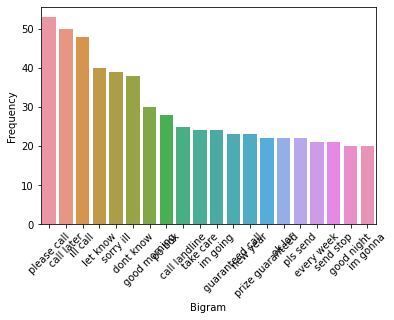

In [45]:
a = sns.barplot(x=x,y=y,data=top_df)
a.set_xticklabels(rotation=45,labels=x)